For the purposes of recreating this notebook (https://github.com/Ocean-Data-Lab/ooipy/blob/master/hydrophone_demo.ipynb) and to learn how OOIPY works.

In [1]:
import ooipy
import datetime
import matplotlib.pyplot as plt

In [16]:
start_time = datetime.datetime(2017, 7, 1, 0, 0, 0)
end_time = datetime.datetime(2017, 7, 1, 0, 1, 0)
node = 'Eastern_Caldera'

print('Downloading Low Frequency Data:')
hdata = ooipy.get_acoustic_data_LF(start_time, end_time, node, verbose=True, zero_mean=True)

In [17]:
print(hdata.stats)

         network: OO
         station: AXEC2
        location: AXEC2
         channel: HDH
       starttime: 2017-07-01T00:00:00.000000Z
         endtime: 2017-07-01T00:01:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 12, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})


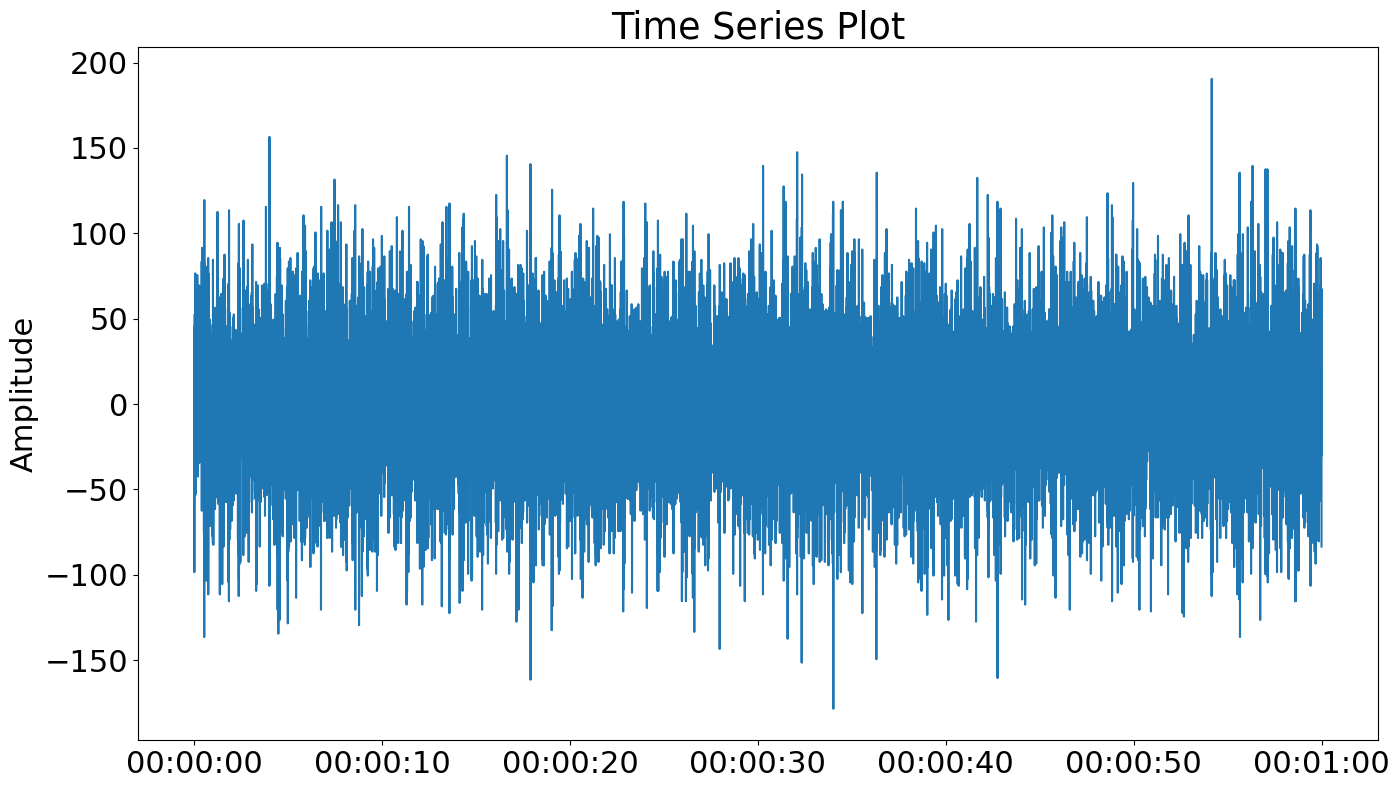

In [18]:
ooipy.plot(hdata)

In [19]:
spec = hdata.compute_spectrogram(avg_time=1, overlap=0)

psd = hdata.compute_psd_welch()

C:\Users\UserALai\miniconda3\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 4096 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


C:\Users\UserALai\miniconda3\lib\site-packages\ooipy\tools\ooiplotlib.py:218: UserWarning: The following kwargs were not used by contour: 'fmax', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'fmin', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_time', 'res_reduction_freq', 'dpi', 'fontsize', 'extend_type', 'logy'
  ax.contourf(


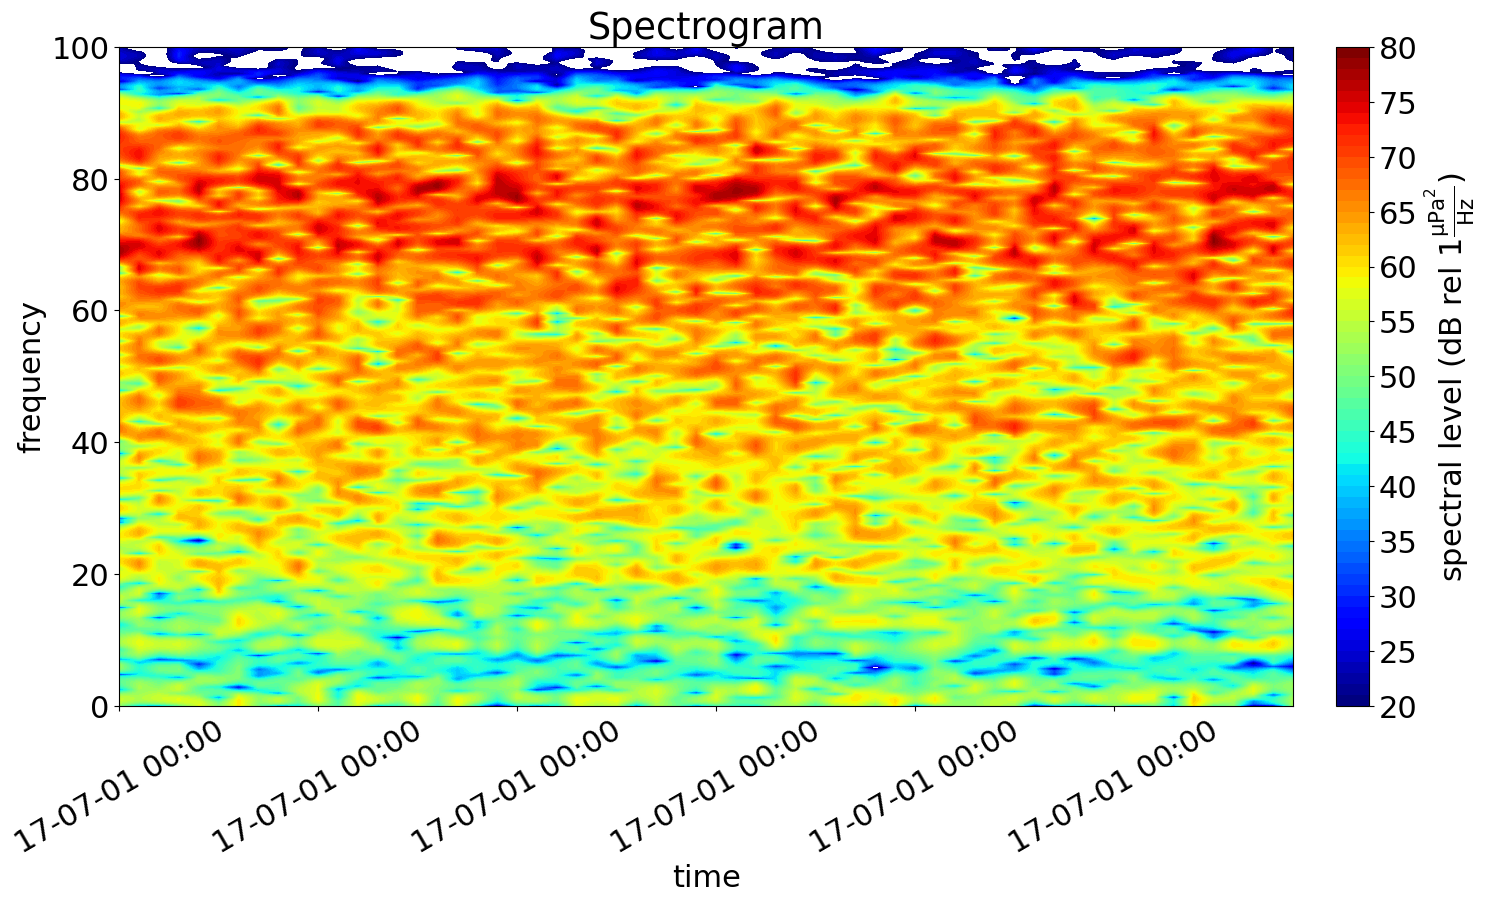

In [25]:
ooipy.plot(spec, fmax=100, xlabel_rot=30)

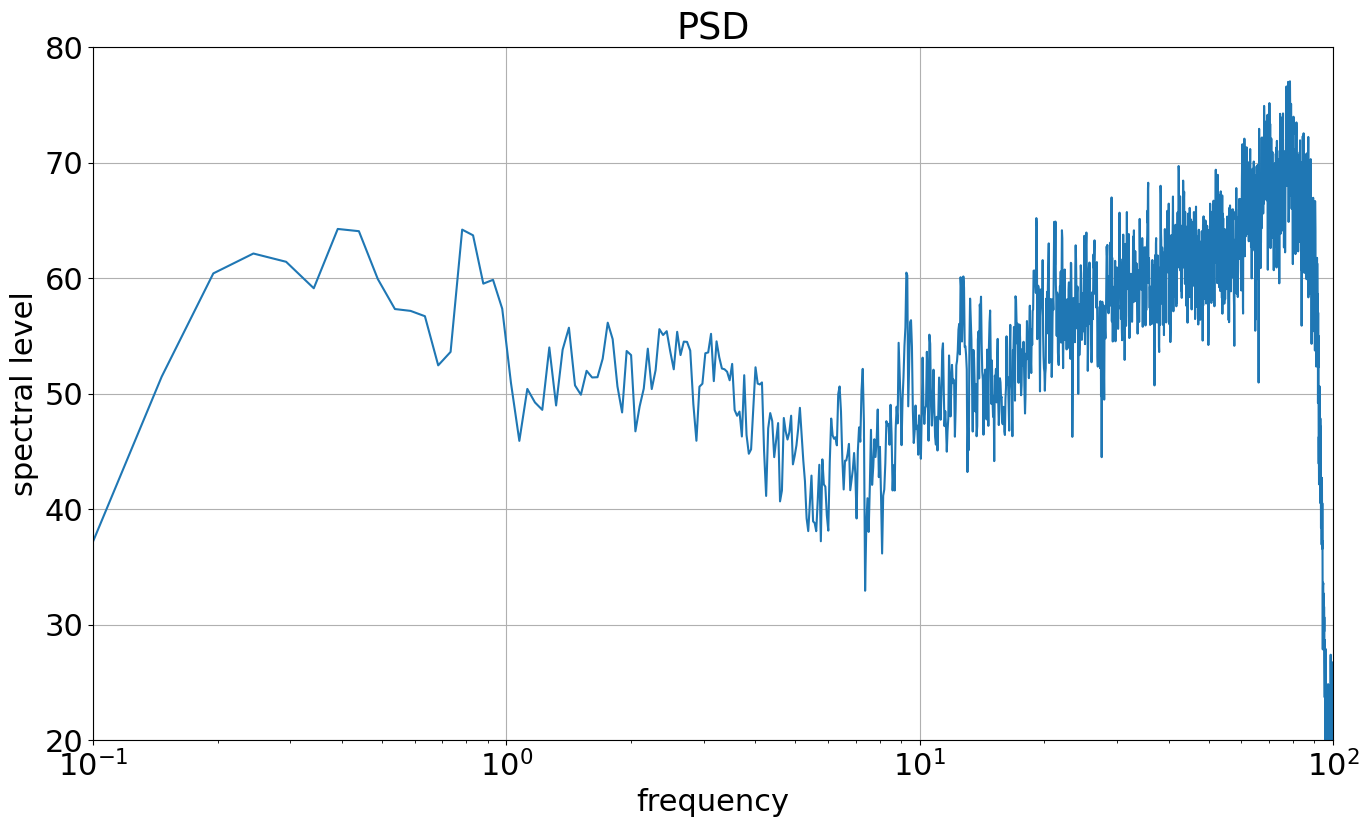

In [29]:
ooipy.plot(psd, fmin=0.10, fmax=100)

In [30]:
psd.save(filename='demo_rec_psd.pkl')
spec.save(filename='demo_rec_spec.pkl')

In [31]:
hdata.wav_write(filename='demo_rec_audio', norm=True, new_sample_rate=44100)

In [40]:
(hdata.psd.freq.shape)

(2049,)